# Assignment 2 vj222hx

Add imports

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sympy import Matrix

### Generate bi-variate normal random numbers

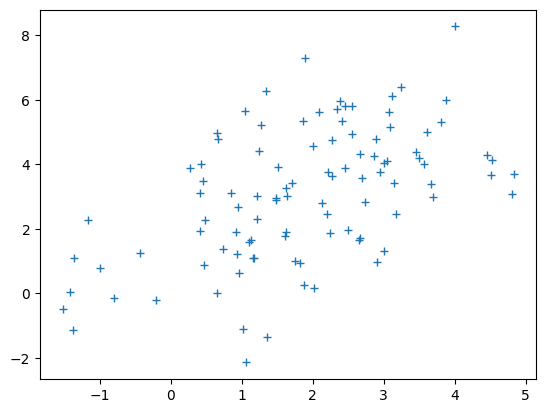

In [24]:
mu = [2, 3]
cov = [[2, 1.5], [1.5, 4]]

np.random.seed(0)
R = np.random.multivariate_normal(mu, cov, 100)

plt.plot(R[:, 0], R[:, 1], '+')
plt.show()

Check variance and correlation

In [25]:
Sample_cov = np.cov(R, rowvar=False)

Cor = np.corrcoef(R, rowvar=False)

print("Sample covariance:\n", Sample_cov)
print("\nCorrelation:\n", Cor)

Sample covariance:
 [[2.04790519 1.5552366 ]
 [1.5552366  4.26664226]]

Correlation:
 [[1.        0.5261365]
 [0.5261365 1.       ]]


Double check cor

In [26]:
print(1.5552 / (2.0479**0.5 * 4.2666**0.5))

0.5261273881487094


###  Perform PCA on the bi-variate normal random numbers

In [27]:
pca = PCA()
pca.fit(R)

loading_vector = pca.components_.T

latent = pca.explained_variance_

score = pca.transform(R)

variability_explained = pca.explained_variance_ratio_ * 100

print("Loading vectors:\n", loading_vector)
print("\nVariance explained:\n", variability_explained)

Loading vectors:
 [[ 0.45786841  0.88901998]
 [ 0.88901998 -0.45786841]]

Variance explained:
 [80.2532502 19.7467498]


Check correlation

In [28]:
print(np.corrcoef(score, rowvar=False))

[[1.00000000e+00 6.44712243e-16]
 [6.44712243e-16 1.00000000e+00]]


In [29]:
print("PC1:", np.linalg.norm(loading_vector[:, 0]))
print("PC2:", np.linalg.norm(loading_vector[:, 1]))
print("Dot prod:", np.dot(loading_vector[:, 0], loading_vector[:, 1]))

PC1: 0.9999999999999999
PC2: 0.9999999999999999
Dot prod: 0.0


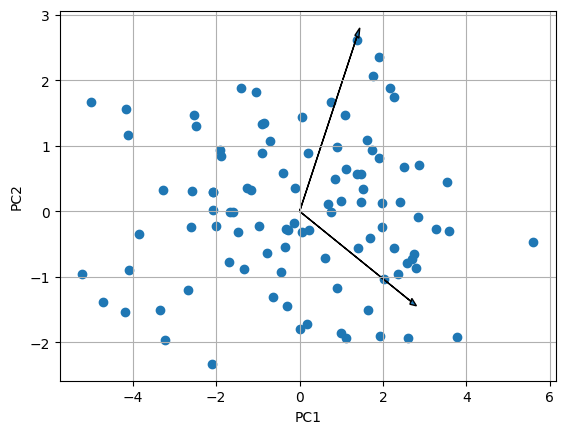

In [30]:
plt.scatter(score[:, 0], score[:, 1])

plt.arrow(0, 0, loading_vector[0, 0]*3, loading_vector[0, 1]*3, head_width=0.1)
plt.arrow(0, 0, loading_vector[1, 0]*3, loading_vector[1, 1]*3, head_width=0.1)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()

### Perform PCA step-by-step

In [31]:
data = R
data[:, 0] = (R[:, 0] - np.mean(R[:, 0])) / np.sqrt(2.0479)
data[:, 1] = (R[:, 1] - np.mean(R[:, 1])) / np.sqrt(4.2666)

Cov = np.cov(data, rowvar=False)

print(Cov)

[[1.00000254 0.52613977]
 [0.52613977 1.00000991]]


In [32]:
eigenvals, eigenvectors = np.linalg.eig(Cov)
print("eigenvectors\n", eigenvectors)
print("eigenvalues\n", eigenvals)

eigenvectors
 [[-0.70710926 -0.7071043 ]
 [ 0.7071043  -0.70710926]]
eigenvalues
 [0.47386645 1.52614599]


Check eigenvalues

In [33]:
print(Cov @ eigenvectors[:, 0] - eigenvals[0] * eigenvectors[:, 0])
print(Cov @ eigenvectors[:, 1] - eigenvals[1] * eigenvectors[:, 1])

[5.55111512e-17 0.00000000e+00]
[0. 0.]


In [34]:
print(np.linalg.norm(eigenvectors[:, 0]))
print(np.linalg.norm(eigenvectors[:, 1]))
print(np.dot(eigenvectors[:, 0], eigenvectors[:, 1]))

1.0
1.0
0.0


In [35]:
score = data@eigenvectors
print(np.corrcoef(score, rowvar=False))

[[1.00000000e+00 2.22950427e-16]
 [2.22950427e-16 1.00000000e+00]]


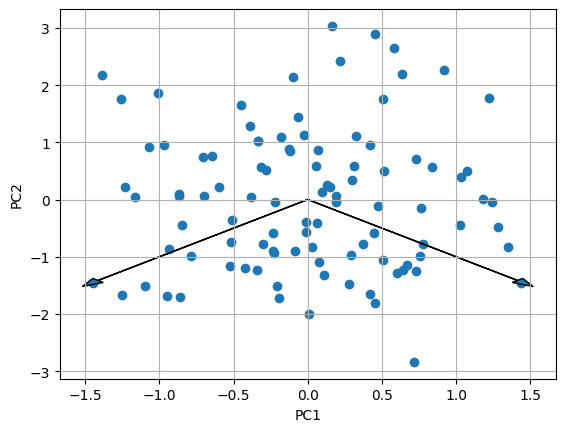

In [36]:
plt.scatter(score[:, 0], score[:, 1])

plt.arrow(0, 0, eigenvectors[0, 0]*2, eigenvectors[0, 1]*2, head_width=0.1)
plt.arrow(0, 0, eigenvectors[1, 0]*2, eigenvectors[1, 1]*2, head_width=0.1)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()

In [37]:
variances = np.var(score, axis=0)
print("Variances:", variances)
print("Explained variance ratio:", variances / sum(variances))

Variances: [0.46912779 1.51088453]
Explained variance ratio: [0.23693175 0.76306825]


Eigenvectors can be negated and that is probably why my arrows are pointing down while they are pointing up in the matlab example, the fix is just to negate the eigenvectors, below is the fixed version

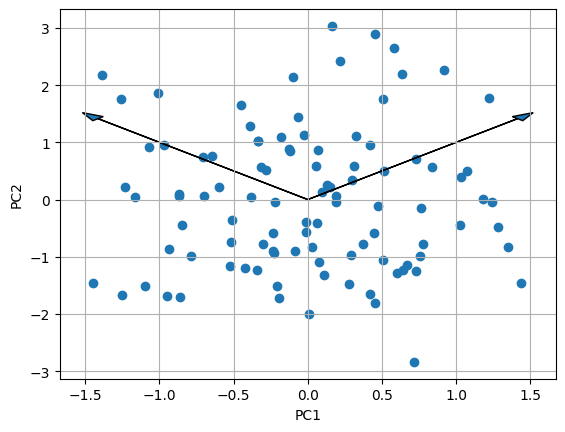

In [38]:
plt.scatter(score[:, 0], score[:, 1])

plt.arrow(0, 0, -eigenvectors[0, 0]*2, -eigenvectors[0, 1]*2, head_width=0.1)
plt.arrow(0, 0, -eigenvectors[1, 0]*2, -eigenvectors[1, 1]*2, head_width=0.1)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()

In [39]:
print("Covariance matrix\n", Cov)
a = 1
b = -Cov[0, 0] - Cov[1, 1]
c = Cov[0, 0] * Cov[1, 1] - Cov[0, 1] * Cov[1, 0]

eigenvalues = np.roots([a, b, c])
print("Eigenvalues\n", eigenvalues)

Covariance matrix
 [[1.00000254 0.52613977]
 [0.52613977 1.00000991]]
Eigenvalues
 [1.52614599 0.47386645]


In [40]:
lambda1 = np.diag([eigenvalues[0], eigenvalues[0]])
print("lambda 1\n", lambda1)
Char1 = Cov - lambda1
print(np.linalg.det(Char1))

lambda2 = np.diag([eigenvalues[1], eigenvalues[1]])
Char2 = Cov - lambda2
print(np.linalg.det(Char2))

lambda 1
 [[1.52614599 0.        ]
 [0.         1.52614599]]
1.1682731586993427e-16
1.1682649757611754e-16


In [41]:
A1 = Cov - lambda1

print("A1:\n", A1)
print("Rank A1:", np.linalg.matrix_rank(A1))
print("Det A1:", np.linalg.det(A1))
rref = np.array(Matrix(np.round(A1, 5)).rref()[0]).astype(np.float64)
print("RREF A1:\n", rref)

A1:
 [[-0.52614346  0.52613977]
 [ 0.52613977 -0.52613609]]
Rank A1: 1
Det A1: 1.1682731586993427e-16
RREF A1:
 [[ 1. -1.]
 [ 0.  0.]]


In [42]:
v1 = np.array([-rref[0, 1], 1])
print("Eigenvector 1:", v1 / np.linalg.norm(v1))

Eigenvector 1: [0.70710678 0.70710678]


In [43]:
A2 = Cov - lambda2
rref2 = np.array(Matrix(np.round(A2, 5)).rref()[0]).astype(np.float64)
v2 = np.array([-rref2[0, 1], 1])
print("Eigenvector 2:", v2 / np.linalg.norm(v2))

Eigenvector 2: [-0.70710678  0.70710678]
